## Problema de Classificação

- 27 atributos numéricos e categóricos que descrevem o estado de saúde de cavalos.
- Três classes de saída que indicam o que aconteceu com o cavalo: morreu, viveu ou se foi submetido à eutanásia. A idéia é prever se um cavalo pode sobreviver ou não baseado nas condições médicas passadas.

### Informações dos atributos

1. **surgery (binário)**: Se fez ou não cirurgia
2. **age (binário)**: Se é adulto ou novo (< 6 meses)
3. **hospital_number (categórico)**: Identidade numérica para o caso determinado para o cavalo
4. **rectal_temp (contínuo)**: Temperatura do cavalo
5. **pulse (contínuo)**: Batimento cardíaco em bpm
6. **respiratory_rate (contínuo)**: Taxa respiratória
7. **temp_of_extremities (categórico)**: Indicação subjetiva da circulação periférica (normal/warm/cool/cold)
8. **peripheral_pulse (categórico)**: Indicação subjetiva da pulsação periférica (normal/increased/reduced/absent)
9. **mucous_membrane (categórico)**: Medida subjetiva da cor da mucosa (normal pink/bright pink/pale pink/pale cyanotic/bright red - injected/dark cyanotic)
10. **capillary_refill_time (binário)**: Julgamento clínico. Quanto maior, mais pobre a circulação
11. **pain (categórico)**: Julgamento subjetivo do nível de dor do cavalo (no pain/depressed/mild pain/severe pain/continuous severe pain)
12. **peristalsis (categórico)**: Indicador da atividade do intestino do cavalo (hypermotile/normal/hypomotile/absent)
13. **abdominal_distention (categórico)**: Distensão abdominal (none/slight/moderate/severe)
14. **nasogastric_tube (categórico)**: Gás saindo do tubo (none/slight/significant)
15. **nasogastric_reflux (categórico)**: Refluxo (none/> 1 liter/< 1 liter)
16. **nasogastric_reflux_ph (ordinal)**: PH entre 0 e 14 (7 neutro)
17. **rectal_exam_feces (categórico)**: Exame de fezes (normal/increased/decreased/absent)
18. **abdomen (categórico)**: (normal/other/firm feces in the large intestine/distended small intestine/distended large intestine)
19. **packed_cell_volume (contínuo)**: Número de celulas vermelhas por volume de sangue
20. **total_protein (contínuo)**: Proteína (gms/dL)
21. **abdomo_appearance (categórico)**: Fluido obtido do abdomen (clear/cloudy/serosanguinous)
22. **abdomo_protein (contínuo)**: Proteína
23. **outcome (categórico)**: O que aconteceu com o cavalo (lived/died/euthanized)
24. **surgical_lesion (binário)**

28. **cp_data (binário)**: Existe dados de patologia? (Sem significância)

In [1]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import LabelEncoder

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier

from sklearn.model_selection import GridSearchCV, KFold
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [2]:
df1 = pd.read_csv('horse.csv')
df2 = pd.read_csv('horseTest.csv')

print("\nTipos de cada atributo:")
print(df1.dtypes)

df1.head()


Tipos de cada atributo:
surgery                   object
age                       object
hospital_number            int64
rectal_temp              float64
pulse                    float64
respiratory_rate         float64
temp_of_extremities       object
peripheral_pulse          object
mucous_membrane           object
capillary_refill_time     object
pain                      object
peristalsis               object
abdominal_distention      object
nasogastric_tube          object
nasogastric_reflux        object
nasogastric_reflux_ph    float64
rectal_exam_feces         object
abdomen                   object
packed_cell_volume       float64
total_protein            float64
abdomo_appearance         object
abdomo_protein           float64
outcome                   object
surgical_lesion           object
lesion_1                   int64
lesion_2                   int64
lesion_3                   int64
cp_data                   object
dtype: object


,surgery,age,hospital_number,rectal_temp,pulse,respiratory_rate,temp_of_extremities,peripheral_pulse,mucous_membrane,capillary_refill_time,...,packed_cell_volume,total_protein,abdomo_appearance,abdomo_protein,outcome,surgical_lesion,lesion_1,lesion_2,lesion_3,cp_data
0,no,adult,530101,38.5,66.0,28.0,cool,reduced,NaN,more_3_sec,...,45.0,8.4,NaN,NaN,died,no,11300,0,0,no
1,yes,adult,534817,39.2,88.0,20.0,NaN,NaN,pale_cyanotic,less_3_sec,...,50.0,85.0,cloudy,2.0,euthanized,no,2208,0,0,no
2,no,adult,530334,38.3,40.0,24.0,normal,normal,pale_pink,less_3_sec,...,33.0,6.7,NaN,NaN,lived,no,0,0,0,yes
3,yes,young,5290409,39.1,164.0,84.0,cold,normal,dark_cyanotic,more_3_sec,...,48.0,7.2,serosanguious,5.3,died,yes,2208,0,0,yes
4,no,adult,530255,37.3,104.0,35.0,NaN,NaN,dark_cyanotic,more_3_sec,...,74.0,7.4,NaN,NaN,died,no,4300,0,0,no


In [3]:
def evaluate_data(df_train, df_test):
    print(f"Dados de Treino\nDados: {df_train.shape[0]} - Atributos: {df_train.shape[1] - 1}")
    print(f"\nDados de Teste\nDados: {df_test.shape[0]} - Atributos: {df_test.shape[1] - 1}")

    print("\nValores faltantes (Treino) para cada atributo:")
    print(df_train.isna().sum())
    
evaluate_data(df1, df2)

Dados de Treino
Dados: 299 - Atributos: 27

Dados de Teste
Dados: 89 - Atributos: 27

Valores faltantes (Treino) para cada atributo:
surgery                    0
age                        0
hospital_number            0
rectal_temp               60
pulse                     24
respiratory_rate          58
temp_of_extremities       56
peripheral_pulse          69
mucous_membrane           47
capillary_refill_time     32
pain                      55
peristalsis               44
abdominal_distention      56
nasogastric_tube         104
nasogastric_reflux       106
nasogastric_reflux_ph    246
rectal_exam_feces        102
abdomen                  118
packed_cell_volume        29
total_protein             33
abdomo_appearance        165
abdomo_protein           198
outcome                    0
surgical_lesion            0
lesion_1                   0
lesion_2                   0
lesion_3                   0
cp_data                    0
dtype: int64


In [5]:
def cleaning_data(dataframe):
    
    df = dataframe.drop(columns=['nasogastric_reflux_ph']) # Drop 'nasogastric_reflux_ph': too much missing values
    df = df.drop(columns=['hospital_number', 'cp_data'])   # Drop 'hospital_number', cp_data': Not relevant
    df = df.drop(columns=['lesion_2', 'lesion_3'])         # Drop 'lesion_2', 'lesion_3': Same value for almost all data
    
    df['outcome'].replace('euthanized', 'died', inplace=True)
    y = df['outcome']
    
    # For numerical attributes, fill NaN values for the mean
    numerical_cols = df.columns[df.dtypes != object].tolist()
    df[numerical_cols].astype('float')
    mean_values = df[numerical_cols].mean()
    for column in numerical_cols:
        df[column] = df[column].fillna(mean_values[column])
        
    # For categorical attributes
    categorical_cols = df.columns[df.dtypes == object].tolist()
    df[categorical_cols] = df[categorical_cols].astype('category')
    df['lesion_1'] = df['lesion_1'].astype('category')
    df['lesion_1'] = df['lesion_1'].cat.codes
    mode_values = df[categorical_cols].mode()
    
    for column in categorical_cols:
        df[column] = df[column].fillna(mode_values[column][0])
    
    # Encoding categorical data
    X = df.drop(columns=['outcome'])
    X = pd.get_dummies(X, prefix_sep='_', drop_first=True)
    
    return X, y

X, y = cleaning_data(df1)
X_test, y_test = cleaning_data(df2)

In [6]:
evaluate_data(X, X_test)
X.head()

Dados de Treino
Dados: 299 - Atributos: 45

Dados de Teste
Dados: 89 - Atributos: 45

Valores faltantes (Treino) para cada atributo:
rectal_temp                         0
pulse                               0
respiratory_rate                    0
packed_cell_volume                  0
total_protein                       0
abdomo_protein                      0
lesion_1                            0
surgery_yes                         0
age_young                           0
temp_of_extremities_cool            0
temp_of_extremities_normal          0
temp_of_extremities_warm            0
peripheral_pulse_increased          0
peripheral_pulse_normal             0
peripheral_pulse_reduced            0
mucous_membrane_bright_red          0
mucous_membrane_dark_cyanotic       0
mucous_membrane_normal_pink         0
mucous_membrane_pale_cyanotic       0
mucous_membrane_pale_pink           0
capillary_refill_time_less_3_sec    0
capillary_refill_time_more_3_sec    0
pain_depressed                 

,rectal_temp,pulse,respiratory_rate,packed_cell_volume,total_protein,abdomo_protein,lesion_1,surgery_yes,age_young,temp_of_extremities_cool,...,rectal_exam_feces_decreased,rectal_exam_feces_increased,rectal_exam_feces_normal,abdomen_distend_small,abdomen_firm,abdomen_normal,abdomen_other,abdomo_appearance_cloudy,abdomo_appearance_serosanguious,surgical_lesion_yes
0,38.5,66.0,28.0,45.0,8.4,3.039604,55,0,0,1,...,1,0,0,0,0,0,0,1,0,0
1,39.2,88.0,20.0,50.0,85.0,2.000000,13,1,0,1,...,0,0,0,0,0,0,1,1,0,0
2,38.3,40.0,24.0,33.0,6.7,3.039604,0,0,0,0,...,0,0,1,0,0,1,0,1,0,0
3,39.1,164.0,84.0,48.0,7.2,5.300000,13,1,1,0,...,1,0,0,0,0,0,0,0,1,1
4,37.3,104.0,35.0,74.0,7.4,3.039604,36,0,0,1,...,0,0,0,0,0,0,0,1,0,0


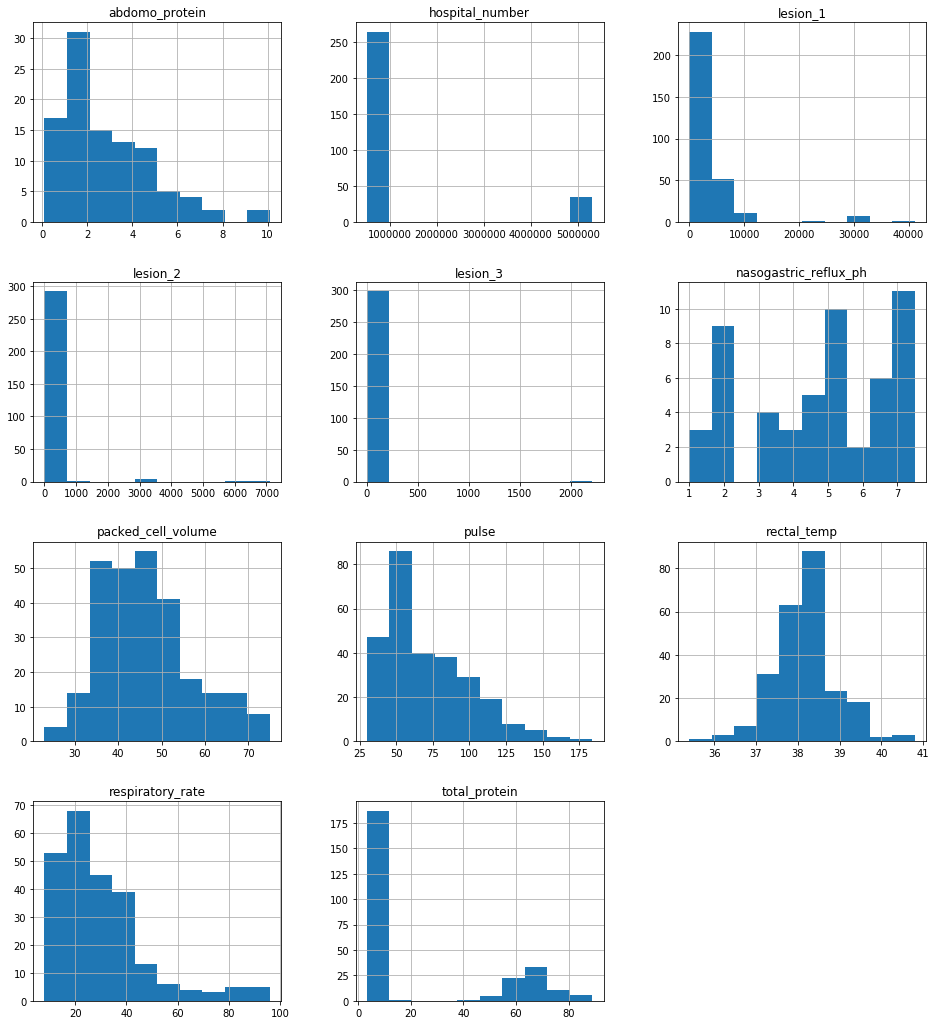

In [8]:
numerical_cols = df1.columns[df1.dtypes != 'object'].tolist()
hist = df1[numerical_cols].hist(figsize=(16, 18))

In [9]:
def normalize(X):
    X_norm = X.copy(deep=True)
    numerical_cols = X_norm.columns[X_norm.dtypes == 'float'].tolist()
    X_norm[numerical_cols] = (X_norm[numerical_cols] - X_norm[numerical_cols].min()) / (X_norm[numerical_cols].max() - X_norm[numerical_cols].min())
    return X_norm

def grid_search(classifier, parameters, X, y):
    clf = GridSearchCV(classifier, parameters, verbose=1)
    clf.fit(X, y)
    print(clf.best_score_, clf.best_params_)
    
def train_models(models, X, y, X_test, y_test, k=30):
    metrics = {}
    X_norm = normalize(X)
    X_test_norm = normalize(X_test)
    kf = KFold(n_splits=k, shuffle=True)
    X_norm = X_norm.values
    y = y.values
    for model in models:
        clf = models[model]
        metrics[model] = {'train': [], 'valid':[], 'test': []}
        for train_index, valid_index in kf.split(X_norm):
            X_train, X_valid = X_norm[train_index], X_norm[valid_index]
            y_train, y_valid = y[train_index], y[valid_index]
            clf.fit(X_train, y_train)
            y_pred_train = clf.predict(X_train)
            y_pred_valid = clf.predict(X_valid)
            y_pred_test = clf.predict(X_test_norm)
            metrics[model]['train'].append(accuracy_score(y_train, y_pred_train))
            metrics[model]['valid'].append(accuracy_score(y_valid, y_pred_valid))
            metrics[model]['test'].append(accuracy_score(y_test, y_pred_test))
            
        print(model)
        mean_train_accuracy = np.round(np.array(metrics[model]['train']).mean(), 3)
        mean_train_accuracy_std = np.round(np.array(metrics[model]['train']).std() * 2, 3)
        print(f'Train\t\t Accuracy: {mean_train_accuracy} (+/- {mean_train_accuracy_std})')
        mean_valid_accuracy = np.round(np.array(metrics[model]['valid']).mean(), 3)
        mean_valid_accuracy_std = np.round(np.array(metrics[model]['valid']).std() * 2, 3)
        print(f'Validation\t Accuracy: {mean_valid_accuracy} (+/- {mean_valid_accuracy_std})')
        mean_test_accuracy = np.round(np.array(metrics[model]['test']).mean(), 3)
        mean_test_accuracy_std = np.round(np.array(metrics[model]['test']).std() * 2, 3)
        print(f'Test\t\t Accuracy: {mean_test_accuracy} (+/- {mean_test_accuracy_std})')
        print(f'\nConfusion Matrix (Last Fold): \n{confusion_matrix(y_test, y_pred_test)}')
        print(f'\nClassifier Report (Last Fold): \n{classification_report(y_test, y_pred_test)}')
        print('-'*40)
    
    return metrics

In [10]:
# Train a model
models = {
    'Logistic_Regression': LogisticRegression(solver='liblinear', C=0.1),
    'Decision_Tree': DecisionTreeClassifier(),
    'Random_Forest': RandomForestClassifier(n_estimators=300, max_features=1, max_depth=60, bootstrap=True),
    'Gradient_Boosting': GradientBoostingClassifier(n_estimators=300, max_features=1, learning_rate=0.05, max_depth=60),
    'Gaussian_Naive_Bayes': GaussianNB(),
    'Support_Vector_Machine': SVC(C=15.0, kernel='poly'),
    'K-Nearest_Neighbors': KNeighborsClassifier(n_neighbors=2)
}

metrics = train_models(models, X, y, X_test, y_test)

Logistic_Regression
Train		 Accuracy: 0.764 (+/- 0.014)
Validation	 Accuracy: 0.729 (+/- 0.302)
Test		 Accuracy: 0.785 (+/- 0.022)

Confusion Matrix (Last Fold): 
[[24 12]
 [ 8 45]]

Classifier Report (Last Fold): 
              precision    recall  f1-score   support

        died       0.75      0.67      0.71        36
       lived       0.79      0.85      0.82        53

    accuracy                           0.78        89
   macro avg       0.77      0.76      0.76        89
weighted avg       0.77      0.78      0.77        89

----------------------------------------
Decision_Tree
Train		 Accuracy: 1.0 (+/- 0.0)
Validation	 Accuracy: 0.656 (+/- 0.308)
Test		 Accuracy: 0.805 (+/- 0.089)

Confusion Matrix (Last Fold): 
[[25 11]
 [ 6 47]]

Classifier Report (Last Fold): 
              precision    recall  f1-score   support

        died       0.81      0.69      0.75        36
       lived       0.81      0.89      0.85        53

    accuracy                           0.81     